In [11]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
carseats = pd.read_csv('~/Independent Study /Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
seat_model = smf.ols('Sales ~ Price + Urban + US', data = carseats).fit()
print(seat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        09:59:00   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

- Price: The coefficient represents the change in Sales for a one-unit increase in Price, holding all other variables constant.
- Urban: This represents the difference in Sales between stores in Urban and non-Urban locations
- US: ...


(c) Write out the model in equation form, being careful to handle the qualitative variables properly.


Sales = B_0+B_1*(Price)+B_2*(Urban)+B_3*(US)+ E

d.) For which of the predictors can you reject the null hypothesis H0 : β_j = 0?


In [6]:
# P-values 
p_value = seat_model.pvalues
print(p_value)

Intercept       3.626602e-62
Urban[T.Yes]    9.357389e-01
US[T.Yes]       4.860245e-06
Price           1.609917e-22
dtype: float64


- If the p-value is below the sig fig alpha = 0.05, reject the hypothesis  

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [8]:
smaller_model = smf.ols('Sales ~ Price + US', data=carseats).fit()
print(smaller_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        10:43:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [10]:
# 95% CI Interval 
conf_int = smaller_model.conf_int(alpha=0.05)
print(conf_int)

                  0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

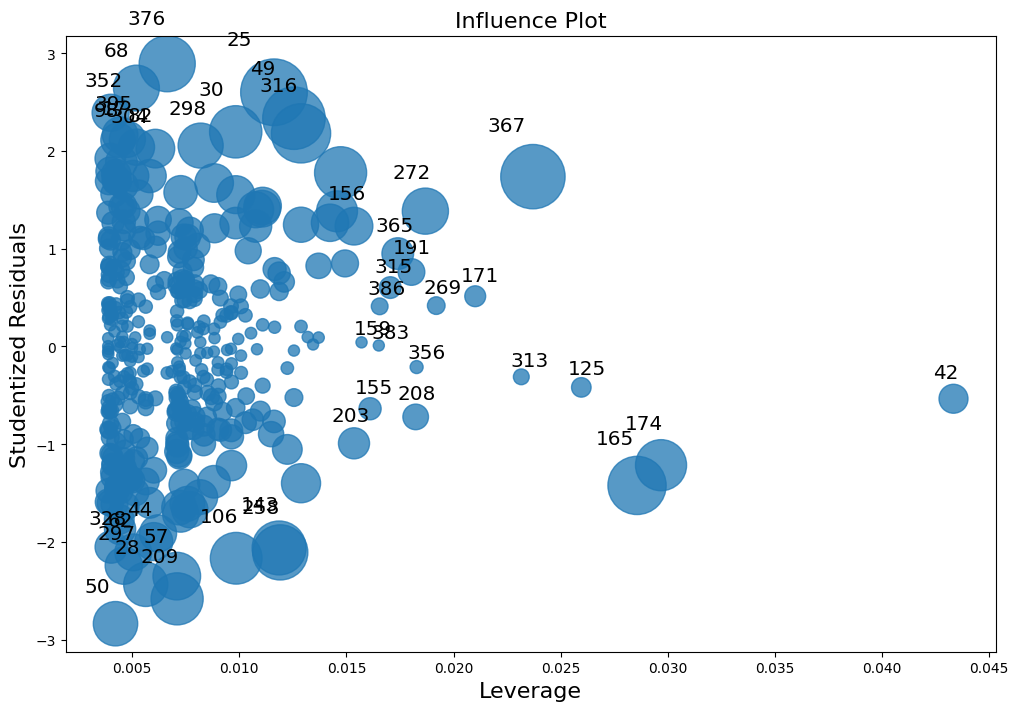

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(smaller_model, ax=ax, criterion="cooks")
plt.show()